In [390]:
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import SGDClassifier
from sklearn.svm import LinearSVC
import operator
from sklearn.model_selection import KFold
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression

In [391]:
#gets names of all attributes from spambase.names file
ma = open("spambase.names","r").read().split("\n")[-58:]
ma = [x.split(":")[0] for x in ma]
#rename last column to class
ma[-1] = "class"

In [392]:
#extracts data from spambase.data
mails = pd.read_csv("spambase.data",names = ma)

In [393]:
# Number of Attributes: 58 (57 continuous, 1 nominal class label)
# spam (1) or not (0)
mails.head()

,word_freq_make,word_freq_address,word_freq_all,word_freq_3d,word_freq_our,word_freq_over,word_freq_remove,word_freq_internet,word_freq_order,word_freq_mail,...,char_freq_;,char_freq_(,char_freq_[,char_freq_!,char_freq_$,char_freq_#,capital_run_length_average,capital_run_length_longest,capital_run_length_total,class
0,0.00,0.64,0.64,0.0,0.32,0.00,0.00,0.00,0.00,0.00,...,0.00,0.000,0.0,0.778,0.000,0.000,3.756,61,278,1
1,0.21,0.28,0.50,0.0,0.14,0.28,0.21,0.07,0.00,0.94,...,0.00,0.132,0.0,0.372,0.180,0.048,5.114,101,1028,1
2,0.06,0.00,0.71,0.0,1.23,0.19,0.19,0.12,0.64,0.25,...,0.01,0.143,0.0,0.276,0.184,0.010,9.821,485,2259,1
3,0.00,0.00,0.00,0.0,0.63,0.00,0.31,0.63,0.31,0.63,...,0.00,0.137,0.0,0.137,0.000,0.000,3.537,40,191,1
4,0.00,0.00,0.00,0.0,0.63,0.00,0.31,0.63,0.31,0.63,...,0.00,0.135,0.0,0.135,0.000,0.000,3.537,40,191,1


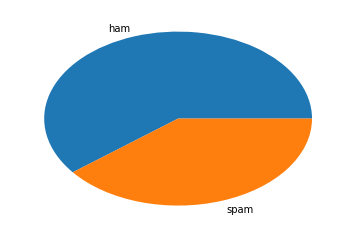

In [394]:
#show percentage of spam and ham
ham_no,spam_no=mails["class"].value_counts()
plt.pie((ham_no,spam_no),labels=("ham","spam"))
plt.show()

In [395]:
#Generate descriptive statistics that summarize the central tendency, dispersion and shape of a dataset’s distribution,
#excluding NaN values.
mails.describe()

,word_freq_make,word_freq_address,word_freq_all,word_freq_3d,word_freq_our,word_freq_over,word_freq_remove,word_freq_internet,word_freq_order,word_freq_mail,...,char_freq_;,char_freq_(,char_freq_[,char_freq_!,char_freq_$,char_freq_#,capital_run_length_average,capital_run_length_longest,capital_run_length_total,class
count,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,...,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000
mean,0.104553,0.213015,0.280656,0.065425,0.312223,0.095901,0.114208,0.105295,0.090067,0.239413,...,0.038575,0.139030,0.016976,0.269071,0.075811,0.044238,5.191515,52.172789,283.289285,0.394045
std,0.305358,1.290575,0.504143,1.395151,0.672513,0.273824,0.391441,0.401071,0.278616,0.644755,...,0.243471,0.270355,0.109394,0.815672,0.245882,0.429342,31.729449,194.891310,606.347851,0.488698
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.588000,6.000000,35.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.065000,0.000000,0.000000,0.000000,0.000000,2.276000,15.000000,95.000000,0.000000
75%,0.000000,0.000000,0.420000,0.000000,0.380000,0.000000,0.000000,0.000000,0.000000,0.160000,...,0.000000,0.188000,0.000000,0.315000,0.052000,0.000000,3.706000,43.000000,266.000000,1.000000
max,4.540000,14.280000,5.100000,42.810000,10.000000,5.880000,7.270000,11.110000,5.260000,18.180000,...,4.385000,9.752000,4.081000,32.478000,6.003000,19.829000,1102.500000,9989.000000,15841.000000,1.000000


In [396]:
# labels are the values containing whether its a spam or not
labels = np.array(mails['class'])

# Remove the class labels from the features
# axis 1 refers to the columns
features= mails.drop('class', axis = 1)
features.head()

,word_freq_make,word_freq_address,word_freq_all,word_freq_3d,word_freq_our,word_freq_over,word_freq_remove,word_freq_internet,word_freq_order,word_freq_mail,...,word_freq_conference,char_freq_;,char_freq_(,char_freq_[,char_freq_!,char_freq_$,char_freq_#,capital_run_length_average,capital_run_length_longest,capital_run_length_total
0,0.00,0.64,0.64,0.0,0.32,0.00,0.00,0.00,0.00,0.00,...,0.0,0.00,0.000,0.0,0.778,0.000,0.000,3.756,61,278
1,0.21,0.28,0.50,0.0,0.14,0.28,0.21,0.07,0.00,0.94,...,0.0,0.00,0.132,0.0,0.372,0.180,0.048,5.114,101,1028
2,0.06,0.00,0.71,0.0,1.23,0.19,0.19,0.12,0.64,0.25,...,0.0,0.01,0.143,0.0,0.276,0.184,0.010,9.821,485,2259
3,0.00,0.00,0.00,0.0,0.63,0.00,0.31,0.63,0.31,0.63,...,0.0,0.00,0.137,0.0,0.137,0.000,0.000,3.537,40,191
4,0.00,0.00,0.00,0.0,0.63,0.00,0.31,0.63,0.31,0.63,...,0.0,0.00,0.135,0.0,0.135,0.000,0.000,3.537,40,191


In [397]:
# Saving feature names for later use(except class)
feature_list = ma[:-1]

# Convert to numpy array
features = np.array(features)

# Random Forest

In [398]:
#initialise overall error rate 
oer = 0
#count fold number
k=0
#create fold, 3 times , shuffle=True will shuffle the data before splitting into batches.
kf = KFold(n_splits=3,shuffle=True)
for train_index, test_index in kf.split(features):
    k+=1
    #print("TRAIN:", train_index, "TEST:", test_index)
    #split the data into training and testing
    train_features, test_features = features[train_index], features[test_index]
    train_labels, test_labels = labels[train_index], labels[test_index]
    print('Training Features Shape:', train_features.shape)
    print('Training Labels Shape:', train_labels.shape)
    print('Testing Features Shape:', test_features.shape)
    print('Testing Labels Shape:', test_labels.shape)

    #print(train_labels)
    #print(test_labels)
    #apply random forest classifier, where random state is the seed used by the random number generator
    rf = RandomForestClassifier(n_estimators = 500, random_state = 42)
    #train the model on given data
    rf.fit(train_features, train_labels)
    
    # Use the forest's predict method on the test data
    predictions = rf.predict(test_features)
    #get accuracy by comparing test label and predictions
    accuracy = accuracy_score(test_labels, predictions)
    # Calculate the absolute errors
    errors = abs(predictions - test_labels)
    # Calculate mean absolute percentage error (MAPE)
    mean_error = 100 * (sum(errors) / len(test_labels))
    print('\nAccuracy for',k,"th fold is:", round(accuracy, 2),"\n")
    #generate confusion matrix which has false positive, flase negative, true positive and true negative
    cm = confusion_matrix(test_labels,predictions , labels=None)
    #extract false positive and false negative
    fp = cm[0,1]
    fn = cm[1,0]
    mean_error = round(mean_error, 2)
    name = np.array(["false positive","false negative","overall error"])
    data = [[fp,fn,mean_error]]
    table_rf.append(data)
    observation = pd.DataFrame(data,columns = name)
    #add the mean error to calculate average error rate accross all folds
    oer += mean_error
    print(observation,"\n\n\n")    

Training Features Shape: (3067, 57)
Training Labels Shape: (3067,)
Testing Features Shape: (1534, 57)
Testing Labels Shape: (1534,)

Accuracy for 1 th fold is: 0.95 

   false positive  false negative  overall error
0              22              52           4.82 



Training Features Shape: (3067, 57)
Training Labels Shape: (3067,)
Testing Features Shape: (1534, 57)
Testing Labels Shape: (1534,)

Accuracy for 2 th fold is: 0.95 

   false positive  false negative  overall error
0              28              43           4.63 



Training Features Shape: (3068, 57)
Training Labels Shape: (3068,)
Testing Features Shape: (1533, 57)
Testing Labels Shape: (1533,)

Accuracy for 3 th fold is: 0.95 

   false positive  false negative  overall error
0              34              45           5.15 





mean error( over all folds) rate is : 4.87

In last k fold:

Mislabeled: 79

Most important 5 features are:

 char_freq_!                   0.125880
char_freq_$                   0.095534
word_freq_remove              0.075073
capital_run_length_average    0.065065
word_freq_your                0.064257
dtype: float64


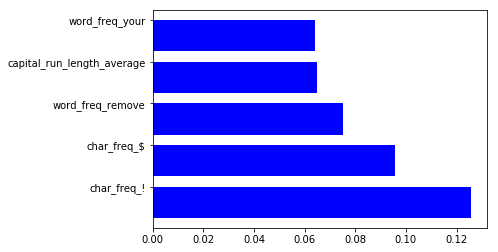

In [399]:
print("mean error( over all folds) rate is :",round(oer/3,2))

feature_imp = pd.Series(rf.feature_importances_,index=feature_list).sort_values(ascending=False)
# Print out the mean absolute error (mae)
print('\nIn last k fold:\n\nMislabeled:', sum(errors))
print("\nMost important 5 features are:\n\n",feature_imp[:5])
#display most important features
ind = np.arange(5)
fig, ax = plt.subplots()    
width = 0.75 # the width of the bars 
ind = np.arange(5) 
ax.barh(ind, feature_imp[:5], width, color="blue")
ax.set_yticks(ind+width/2)
ax.set_yticklabels(feature_imp.index[:5], minor=False)      
plt.show()

# Logistic Regression

In [400]:
oer = 0
k=0
kf = KFold(n_splits=3,shuffle=True)
for train_index, test_index in kf.split(features):
    k+=1
    #print("TRAIN:", train_index, "TEST:", test_index)
    train_features, test_features = features[train_index], features[test_index]
    train_labels, test_labels = labels[train_index], labels[test_index]
    print('Training Features Shape:', train_features.shape)
    print('Training Labels Shape:', train_labels.shape)
    print('Testing Features Shape:', test_features.shape)
    print('Testing Labels Shape:', test_labels.shape)

    classifier = LogisticRegression()
    classifier.fit(train_features, train_labels)
    # Use the logistic regressions predict method on the test data
    predictions = classifier.predict(test_features)
    accuracy = accuracy_score(test_labels, predictions)
    # Calculate the absolute errors
    errors = abs(predictions - test_labels)
    # Calculate mean absolute percentage error (MAPE)
    mean_error = 100 * (sum(errors) / len(test_labels))
    print('\nAccuracy for',k,"th fold is:", round(accuracy, 2),"\n")
    cm = confusion_matrix(test_labels,predictions , labels=None)
    #extract false positive and false negative
    fp = cm[0,1]
    fn = cm[1,0]
    mean_error = round(mean_error, 2)
    name = np.array(["false positive","false negative","overall error"])
    data = [[fp,fn,mean_error]]
    observation = pd.DataFrame(data,columns = name)
    oer += mean_error
    print(observation,"\n\n\n")
    
    

Training Features Shape: (3067, 57)
Training Labels Shape: (3067,)
Testing Features Shape: (1534, 57)
Testing Labels Shape: (1534,)

Accuracy for 1 th fold is: 0.92 

   false positive  false negative  overall error
0              54              65           7.76 



Training Features Shape: (3067, 57)
Training Labels Shape: (3067,)
Testing Features Shape: (1534, 57)
Testing Labels Shape: (1534,)

Accuracy for 2 th fold is: 0.93 

   false positive  false negative  overall error
0              37              73           7.17 



Training Features Shape: (3068, 57)
Training Labels Shape: (3068,)
Testing Features Shape: (1533, 57)
Testing Labels Shape: (1533,)

Accuracy for 3 th fold is: 0.93 

   false positive  false negative  overall error
0              45              62           6.98 





In [401]:
print("mean error( over all folds) rate is :",round(oer/3,2))
print('\nIn last k fold Mislabeled:', sum(errors))


mean error( over all folds) rate is : 7.3

In last k fold Mislabeled: 107


# Naive Bayes

In [402]:
kf = KFold(n_splits=3,shuffle=True)
oer=0
k=0
for train_index, test_index in kf.split(features):
    k+=1
    train_features, test_features = features[train_index], features[test_index]
    train_labels, test_labels = labels[train_index], labels[test_index]
    print('Training Features Shape:', train_features.shape)
    print('Training Labels Shape:', train_labels.shape)
    print('Testing Features Shape:', test_features.shape)
    print('Testing Labels Shape:', test_labels.shape)

    #print(train_labels)
    #print(test_labels)
    mnb = MultinomialNB().fit(train_features, train_labels)
    # Use the Naive bayes's predict method on the test data
    predictions = mnb.predict(test_features)
    accuracy = accuracy_score(test_labels, predictions)
    # Calculate the absolute errors
    errors = abs(predictions - test_labels)
    # Calculate mean absolute percentage error (MAPE)
    mean_error = 100 * (sum(errors) / len(test_labels))
    print('\nAccuracy for',k,"th fold is:", round(accuracy, 2),"\n")
    cm = confusion_matrix(test_labels,predictions , labels=None)
    #extract false positive and false negative
    fp = cm[0,1]
    fn = cm[1,0]
    mean_error = round(mean_error, 2)
    name = np.array(["false positive","false negative","overall error"])
    data = [[fp,fn,mean_error]]
    observation = pd.DataFrame(data,columns = name)
    oer += mean_error
    print(observation,"\n\n\n")

Training Features Shape: (3067, 57)
Training Labels Shape: (3067,)
Testing Features Shape: (1534, 57)
Testing Labels Shape: (1534,)

Accuracy for 1 th fold is: 0.78 

   false positive  false negative  overall error
0             150             192          22.29 



Training Features Shape: (3067, 57)
Training Labels Shape: (3067,)
Testing Features Shape: (1534, 57)
Testing Labels Shape: (1534,)

Accuracy for 2 th fold is: 0.79 

   false positive  false negative  overall error
0             153             168          20.93 



Training Features Shape: (3068, 57)
Training Labels Shape: (3068,)
Testing Features Shape: (1533, 57)
Testing Labels Shape: (1533,)

Accuracy for 3 th fold is: 0.81 

   false positive  false negative  overall error
0             152             145          19.37 





In [403]:
print("mean error( over all folds) rate is :",round(oer/3,2))

feature_imp = pd.Series(rf.feature_importances_,index=feature_list).sort_values(ascending=False)
# Print out the mean absolute error (mae)
print('\nIn last k fold Mislabeled:', sum(errors))


mean error( over all folds) rate is : 20.86

In last k fold Mislabeled: 297


# Linear SVM 

In [404]:
kf = KFold(n_splits=3,shuffle=True)
k=0
oer=0
for train_index, test_index in kf.split(features):
    k+=1
    train_features, test_features = features[train_index], features[test_index]
    train_labels, test_labels = labels[train_index], labels[test_index]
    print('Training Features Shape:', train_features.shape)
    print('Training Labels Shape:', train_labels.shape)
    print('Testing Features Shape:', test_features.shape)
    print('Testing Labels Shape:', test_labels.shape)

    #print(train_labels)
    #print(test_labels)
    #Create SVM model with l2 normalisation, The “balanced” mode uses the values of y to automatically adjust weights 
    #inversely proportional to class frequencies in the input data
    svm = LinearSVC(penalty="l2", loss="squared_hinge",class_weight="balanced", max_iter = 2000)
    svm.fit(train_features, train_labels) 
    predictions = svm.predict(test_features)
    accuracy = accuracy_score(test_labels, predictions)
    # Calculate the absolute errors
    errors = abs(predictions - test_labels)
    # Calculate mean absolute percentage error (MAPE)
    mean_error = 100 * (sum(errors) / len(test_labels))
    print('\nAccuracy for',k,"th fold is:", round(accuracy, 2),"\n")
    cm = confusion_matrix(test_labels,predictions , labels=None)
    fp = cm[0,1]
    fn = cm[1,0]
    mean_error = round(mean_error, 2)
    name = np.array(["false positive","false negative","overall error"])
    data = [[fp,fn,mean_error]]
    observation = pd.DataFrame(data,columns = name)
    oer += mean_error
    print(observation,"\n\n\n")

Training Features Shape: (3067, 57)
Training Labels Shape: (3067,)
Testing Features Shape: (1534, 57)
Testing Labels Shape: (1534,)

Accuracy for 1 th fold is: 0.86 

   false positive  false negative  overall error
0             162              52          13.95 



Training Features Shape: (3067, 57)
Training Labels Shape: (3067,)
Testing Features Shape: (1534, 57)
Testing Labels Shape: (1534,)

Accuracy for 2 th fold is: 0.89 

   false positive  false negative  overall error
0              80              85          10.76 



Training Features Shape: (3068, 57)
Training Labels Shape: (3068,)
Testing Features Shape: (1533, 57)
Testing Labels Shape: (1533,)

Accuracy for 3 th fold is: 0.84 

   false positive  false negative  overall error
0             215              33          16.18 





In [405]:
print("mean error( over all folds) rate is :",round(oer/3,2))

# Print out the mean absolute error (mae)
print('\nIn last k fold Mislabeled:', sum(errors))


mean error( over all folds) rate is : 13.63

In last k fold Mislabeled: 248
